# Exercise on Autoencoders

## Use Autoencoders to reconstruct images from the MNIST dataset

In this exercise, we implement an Autoencoder (AE) to reconstruct images from the MNIST dataset. Autoencoders are a type of neural network designed to learn efficient codings of input data by compressing it into a latent space and then reconstructing the original input from this compressed representation.

After training the autoencoder for image reconstruction, we will use it for:

- Image Compression
- Anomaly detection
- kNN Classification using a reduced number of features (optional, only for those who are familiar with the kNN algorithms)


### Authors:
- **Dario Piga**

### Date:
- **2nd February 2025**

### References:
- **Autoencoders (AE)**: Baldi, P. (2012). Autoencoders, unsupervised learning, and deep architectures. In Proceedings of ICML Workshop on Unsupervised and Transfer Learning (pp. 37-49).
- **MNIST Dataset**: A dataset of 70,000 28x28 grayscale images of handwritten digits (0-9). [MNIST website](http://yann.lecun.com/exdb/mnist/)
- **Fashion MNIST Dataset**: A dataset of 70,000 28x28 grayscale images of fashion images (10 classes). [Fashion MNIST website](https://www.kaggle.com/datasets/zalando-research/fashionmnist)



## Instructions

Run the following cells to:

1. Import necessary libraries.
2. Download the MNIST dataset.
3. Visualize some of the images.

Make sure to familiarize yourself with the type of data you are working with. For example, check the dimensions of the training and test sets, as well as the shape of each sample in the dataset.

In [1]:
# Importing necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define transformations: Convert to Tensor and Normalize
transform = transforms.Compose([
    transforms.ToTensor()
])

# Load entire dataset as tensors
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Extract images and labels
X_train = torch.stack([trainset[i][0] for i in range(len(trainset))]).squeeze()  # From shape [60000, 1, 28, 28] to [60000, 1, 28, 28]
y_train = torch.tensor([trainset[i][1] for i in range(len(trainset))])  # Shape: [60000]

X_test = torch.stack([testset[i][0] for i in range(len(testset))]).squeeze()  # From shape [10000, 1, 28, 28] to [10000, 28, 28]
y_test = torch.tensor([testset[i][1] for i in range(len(testset))])  # Shape: [10000]

# Print dataset shapes
print(f"Training set: X_train {X_train.shape}, y_train {y_train.shape}")
print(f"Test set: X_test {X_test.shape}, y_test {y_test.shape}")

Training set: X_train torch.Size([60000, 28, 28]), y_train torch.Size([60000])
Test set: X_test torch.Size([10000, 28, 28]), y_test torch.Size([10000])


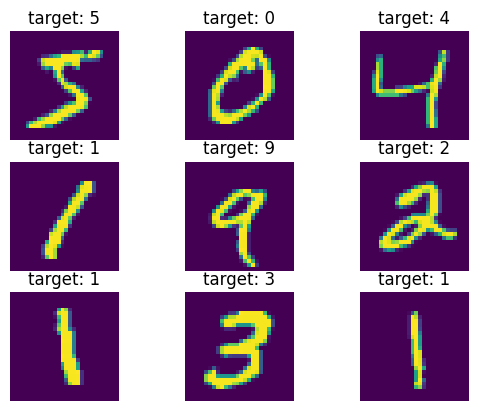

In [3]:
# visualize the first 9 images
plt.figure

count = 0
for row in range(3):
    for col in range(3):
        plt.subplot(3, 3, count+1)
        plt.imshow(X_train[count,:])
        plt.title(f"target: {y_train[count].item()}")
        plt.axis('off')
        count +=1

## Exercise 1

In this exercise, you will use the Autoencoder for Image compression.

# Task:

Condider the training images uploaded in the previous cells. Train an Autoencoder that takes these images as inputs and returns the same images. As a size for the latent variable $z$ coming as output of the encoder, you may choose $n_z \leq 30$  


# Suggested steps:

1. Create an `Encoder` as a fully connected neural network, inheriting from the class `nn.Module`. The encoder should take an input dataset $X$ and return the latent variables $z$. Implement this encoder and verify that for a given input $X$, the model outputs a variable of size $n_z$. Suggestion: As input for the encoder, reshape the pixels of the 2-D images (28x28 matrix) into a 1-D vector of size 784 (=28x28). 
 
2. Create a `Decoder` as a fully connected neural network, inheriting from the class `nn.Module`. The decoder should take as input the latent variable $z$ and reconstruct the image $X$. Specifically, the decoder will output the pixel intensities, which should take values between 0 and 1. For this reason, we suggest to use a sigmoid activation function in the final layer. Implement this decoder and verify that for a given latent variable $z$, the model outputs a vector of size 784, which can be shown as $28 \times 28$ image after reshaping.


### AE Architecture:
- The AE should be implemented as a class `Autoencoder` that inherits from `nn.Module`.
- The `forward()` method should:
   - Encode the input to the latent space using the `Encoder`.
   - Decode the latent variable $z$ to reconstruct the input using the `Decoder`.
   
The output of the AE will include the reconstructed input $\hat{X}$ and the latent variable $z$.

### Loss Function:
The total loss minimized during training can be the average of the reconstruction error RE over the dataset (or a minibatch of the dataset). As a reconstruction error, for a given image $X^{i}$, we use the mean square error:

\begin{equation}
RE = \frac{1}{784}\left\| X^{i} - \hat{X}^{i} \right\|^2
\end{equation}

where $X$ is the original input, and $\hat{X}$ is the output of the autoencoder. 

### Training:
Training a good autoencoder can require many iterations of gradient descent. Since the training dataset is pretty large (60'000 samples), completing an iteration can be time consuming. Thus, we suggest to work with mini batches of data at each iteration of gradient descent. Suggested size of the mini batch for each iteration: around 1000. 

### Debugging
After constructing Encoder, Decoder, and Autoencoder, check if the mdoel works as expected. Provide an input image and see if the output of your model has at least the shape you expect. 

In [ ]:
# Create the Encoder block
# You can complete the following cell or rewrite it from scratch

# Create Encoder
class Encoder(nn.Module):
    def __init__(self, ........ ):
        super(Encoder, self).__init__()
        

        ...

    def forward(self, x):
        ...
        z = ...
        return z



In [ ]:
# Create Decoder block
# You can complete the following cell or rewrite it from scratch

class Decoder(nn.Module):
    def __init__(self, ......  ):
        super(Decoder, self).__init__()

        ...
        
    def forward(self, z):
        
        x = ...
        return x


In [ ]:
# Create Autoencoder (You can adapt this cell  based on the Encoder and Decoder models you have defined in the previous cells)

class AutoEncoder(nn.Module):
    def __init__(self, ......  ):
        super(AutoEncoder, self).__init__()
        # Initialize the encoder and decoder
        self.encoder = Encoder(...)
        self.decoder = Decoder(...)

    def forward(self, x):
        # Encode input to latent space
        z = self.encoder(x)
        # Decode latent space back to image
        reconstructed = self.decoder(z)
        return reconstructed, z  # Return reconstructed image and latent vector


In [ ]:
### (Optional) Suggestions for checking if Encoder, Decoder, Autoencoder is working as expected


# Test the Autoencoder architecture

# Extract a set of 10 images
X = X_train[0:10, :, :]  # Shape: (10, 28, 28)
batch_size, H, W = X.shape

# Define model parameters


# Instantiate the encoder model
model_encoder = Encoder(...)
# Forward pass through the encoder
enc_im = model_encoder(X)
print(f"Shape of Encoder output: {enc_im.shape}")  # Expected size: (batch_size, nz)

# Instantiate the decoder model
model_decoder = Decoder(...)
# Forward pass through the decoder
out = model_decoder(enc_im)
print(f"Shape of Decoder output: {out.shape}")  # Expected shape: (batch_size, 28, 28)

# Instantiate the full AutoEncoder
model = AutoEncoder(...)
# Forward pass through the autoencoder
X_hat, z = model(X)
print(f"Shape of Autoencoder output: {X_hat.shape}")  # Expected shape: (batch_size, 28, 28)
print(f"Shape of latent vector: {z.shape}")  # Expected shape: (batch_size, nz)

# Given a value of z, we can also apply it to the decoder and generate an output
X_new = model.decoder(z)
plt.figure()
plt.imshow(X_new[0,:,:].detach())
plt.title('Image generated by a non-trained AE')

In [ ]:
# Train the autoencoder. You can use the following reconstruction loss

def reconstruction_error(X_hat, X):
    # Mean squared error between the reconstructed images and the original images
    RE = torch.nn.functional.mse_loss(X_hat, X, reduction='mean')  # Use PyTorch's built-in MSE function
    return RE

# Example usage:
RE = reconstruction_error(X_hat, X)
print(f"Reconstruction error: {RE.item()}")  # Print the scalar value of the error



## Visualizing AutoEncoder Reconstruction

We now visualize the performance of your trained  Autoencoder (AE) by comparing the original test images to the reconstructed images generated by the VAE.

### Steps:
1. **Pass the test images** through the trained AE to obtain the reconstructed images. 
   
2. **Plot the original and reconstructed images** in a 2x10 grid:
   - The first row will display the original images from the test set.
   - The second row will display the corresponding reconstructed images generated by the AE.

In [10]:
# Write your solution here

...

Ellipsis

# Check size (in MB) of an original training image and the compressed image where only the latent variable z is saved

In [3]:
# check memory storage (you can use the following examples to see how to estimate the size of a zensor)

x_hat, z_hat = model(X_train)

size_z_hat =  z_hat.nelement()*z_hat.element_size() # number of elements of z_hat * size in bytes for each element = size in Byte of compressed tensor
size_train_images = X_train.nelement()*X_train.element_size() # size original images

print(f"size in MB of original dataset: {size_train_images/(1024*1024)}") # Note: this is the size after conversion to Tensor of data type: float32 = 4 Bytes/element 
print(f"size in MB of compressed dataset: {size_z_hat/(1024*1024)}")

NameError: name 'model' is not defined

# Exercise 2: Anomaly Detection

In this exercise, you should use the trained autoencoder for anomaly detection.

Anomaly detection should be performed on an extended dataset which consists of:

- all images from the MNIST dataset. These images are considered as "normal data" as the autoencoder has already been trained on the MNIST dataset (namely, on digits). 

- 10 additional images from the Fashion MNIST dataset, which should be considered as anomalies in our extended dataset

**Steps of the exercise:**

1. Create the extended dataset by concatenating the test set of MNIST with 10 images from the Fashion MNIST dataset.
   
2. Compute the reconstruction error for all the samples in the extended dataset created in step 1 and order the samples from the largest reconstruction error to the smallest.
   
3. Display the images associated with the 10 largest reconstruction errors and comment the results.

### Run the following cells to download the Fashion MNIST dataset, visualize the images and created the new dataset with test images from MNIST and 10 images from Fashion MNIST.

In [26]:
# Load Fashion MNIST dataset

FashionMNIST_dataset_train = torchvision.datasets.FashionMNIST(root='./data', train=True, download=True, transform=transform)


FashionMNIST_images = torch.stack([FashionMNIST_dataset_train[i][0] for i in range(len(FashionMNIST_dataset_train))])  # Training images
FashionMNIST_images = FashionMNIST_images.squeeze()
FashionMNIST_images.shape

torch.Size([60000, 28, 28])

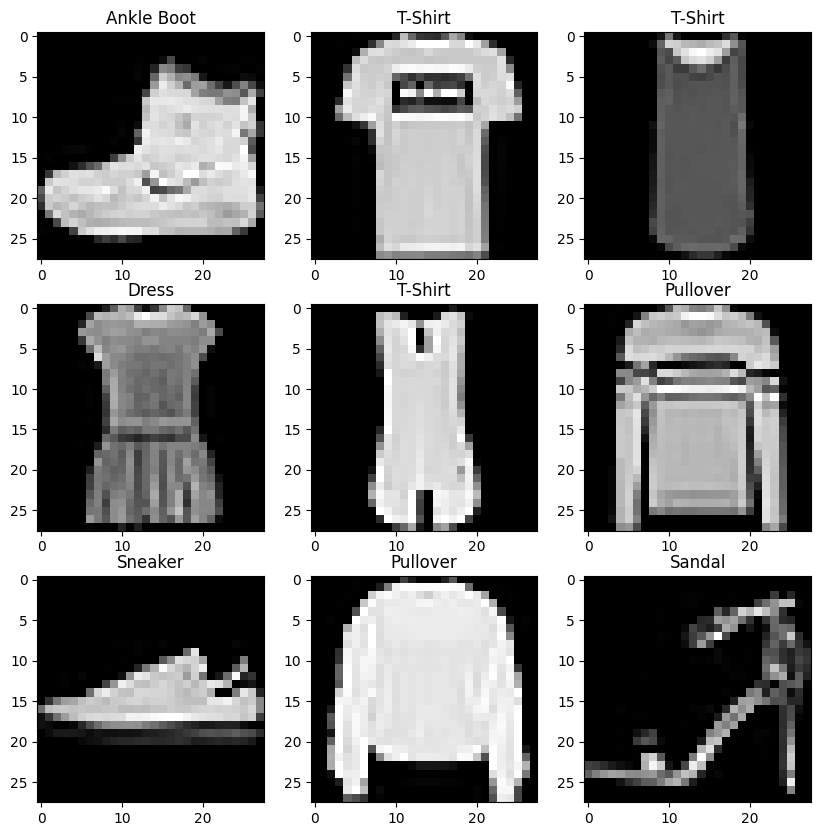

In [27]:
# visualize data

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}


cols, rows = 3, 3

fig = plt.figure(figsize = (10,10))
for ind in range(cols*rows):
    x, y = FashionMNIST_dataset_train[ind]
    fig.add_subplot(rows, cols, ind+1)
    plt.title(f"{labels_map[y]}")
    plt.imshow(x.squeeze(), cmap = 'gray')

In [29]:
#concatanete MNIST testa dataset with first 10 images of the FashionMNIST dataset


extended_dataset = torch.cat((X_test, FashionMNIST_images[0:10,:,:]), dim = 0)
print(f"Shape extended dataset: {extended_dataset.shape}")

Shape extended dataset: torch.Size([10010, 28, 28])


# Exercise 3: Classification with compressed images

Train a knn classifier to predict the digit visualized in the image.

First use original images, then the compressed images.

In both case, compute accuracy and the time taken by a kn--classificator to predict the test images. Comment the results.

In using original images, as features you should use the pixel intensity of the images (after transforming them into a vector)

For compressed, use the latent variables z.

Note: If you use sklear, do not forget to tranfor your Tensors into numpy array.

Note: In the training, use only 5000 images, otherwise the time for prediction of the k-nn algorithm will be very high
Note: in k-nn, you actually do not really train a model. Most of the time is taken to compute prediction. 

 The following cell implements the k-nn classifier on the orginal images. Feel free to use the following code or rewrite it from scratch.

In [4]:
import numpy as np
import time
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Use a subset of the training and test data for having results faster
train_images_subset = X_train[0:5000]  # Use 5000 samples from training set
train_target_subset = y_train[0:5000]  # Corresponding labels

# Flatten the images for KNN
train_images_flat = train_images_subset.view(train_images_subset.size(0), -1)  # Reshape to (batch_size, 28*28)
test_images_flat = X_test.view(X_test.size(0), -1)  # Reshape to (batch_size, 28*28)

# Convert tensors to numpy arrays for sklearn
train_images_np = train_images_flat.numpy()
test_images_np = test_images_flat.numpy()
train_target_np = train_target_subset.numpy()
test_target_np = y_test.numpy()

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors for different K values

# Measure the time taken to fit the classifier
start_time = time.time()

# Fit the classifier on the training data subset
knn.fit(train_images_np, train_target_np)

# Measure the time taken to fit the model
fit_time = time.time() - start_time
print(f"Time to fit the KNN model: {fit_time:.2f} seconds")

# Measure the time taken to predict the test data
start_time = time.time()

# Predict the test labels
test_pred = knn.predict(test_images_np)

# Measure the time taken to predict the test set
predict_time = time.time() - start_time
print(f"Time to predict the test set: {predict_time:.2f} seconds")

# Compute the accuracy
accuracy = accuracy_score(test_target_np, test_pred)
print(f"Accuracy on the test set: {accuracy * 100:.2f}%")


Time to fit the KNN model: 0.02 seconds
Time to predict the test set: 43.60 seconds
Accuracy on the test set: 93.25%
